In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('blood.data')

x = df.iloc[:, :-1].values
x = pd.DataFrame(x, columns = ['Recency', 'Frequency', 'Monetary', 'Time'])
y = df.iloc[:, -1].values
y = pd.DataFrame(y, columns=['Donated'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=0)


In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
print("Train Shape : ",x_train.shape)
print("Test Shape : ",x_test.shape)

Train Shape :  (598, 4)
Test Shape :  (150, 4)


In [6]:
x_train = pd.DataFrame(x_train, columns = ['Recency', 'Frequency', 'Monetary', 'Time'])
x_train.head(5)


,Recency,Frequency,Monetary,Time
97,4,9,2250,38
516,3,5,1250,12
156,2,1,250,2
395,16,10,2500,89
732,23,1,250,23


In [7]:
y_train = pd.DataFrame(y_train, columns = ['Donated'])
y_train.head(5)
y_train.value_counts()

,count
Donated,
0,461
1,137


In [8]:
x_test = pd.DataFrame(x_test, columns=['Recency', 'Frequency', 'Monetary', 'Time'])
x_test.head(5)

,Recency,Frequency,Monetary,Time
258,4,3,750,28
521,2,11,2750,41
14,2,6,1500,15
31,4,10,2500,28
505,2,41,10250,98


In [9]:
y_test = pd.DataFrame(y_test, columns = ['Donated'])
y_test.head(5)

,Donated
258,0
521,1
14,1
31,1
505,1


In [10]:
x_train.describe()

,Recency,Frequency,Monetary,Time
count,598.000000,598.000000,598.000000,598.000000
mean,9.463211,5.428094,1357.023411,34.503344
std,7.766989,5.713191,1428.297707,24.580960
min,0.000000,1.000000,250.000000,2.000000
25%,3.000000,2.000000,500.000000,16.000000
50%,8.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,72.000000,50.000000,12500.000000,98.000000


<Axes: ylabel='Recency'>

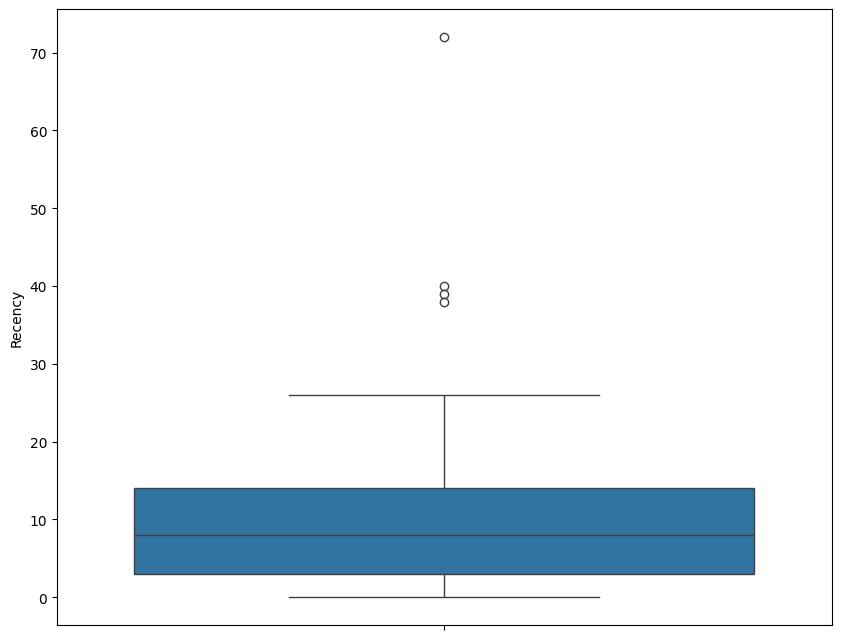

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(y="Recency",data=x_train)

<Axes: >

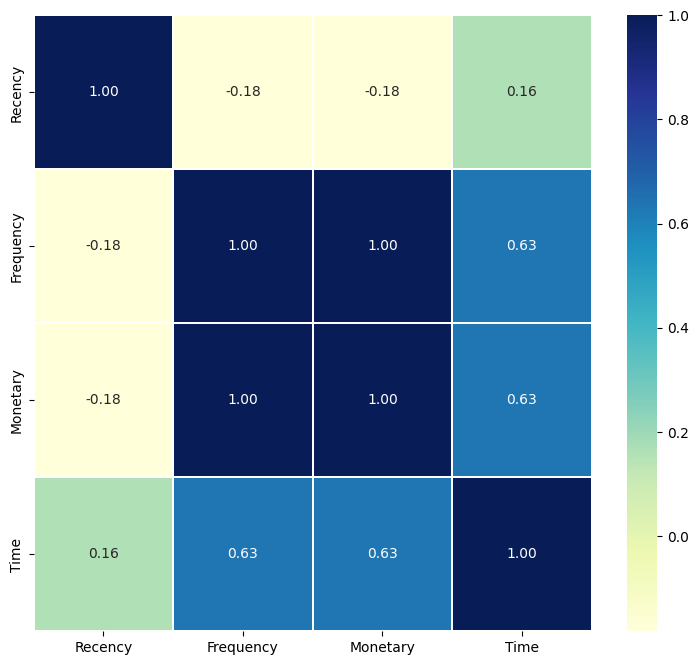

In [12]:
corrmat=x.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True)

In [13]:
x_train['Recency'].unique()

array([ 4,  3,  2, 16, 23, 14,  7, 11,  8, 21,  9, 12,  6, 38, 40, 10, 72,
        1, 17, 20, 13, 22,  5, 15, 18,  0, 26, 39])

<Axes: >

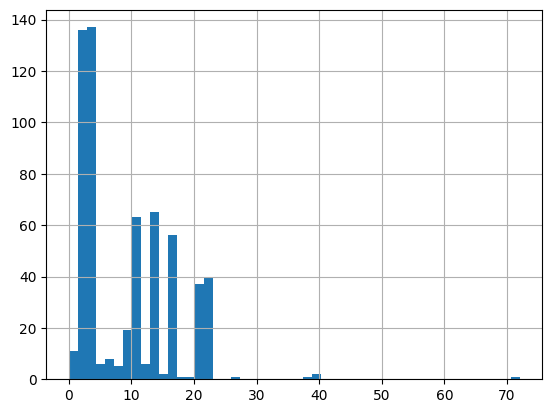

In [14]:
x_train['Recency'].hist(bins=50)

In [15]:
x_train['Donating for'] = x_train['Time'] - x_train['Recency']
x_train.head(5)

,Recency,Frequency,Monetary,Time,Donating for
97,4,9,2250,38,34
516,3,5,1250,12,9
156,2,1,250,2,0
395,16,10,2500,89,73
732,23,1,250,23,0


In [16]:
x_test['Donating for'] = x_test['Time'] - x_test['Recency']
x_test.head(5)

,Recency,Frequency,Monetary,Time,Donating for
258,4,3,750,28,24
521,2,11,2750,41,39
14,2,6,1500,15,13
31,4,10,2500,28,24
505,2,41,10250,98,96


<Axes: >

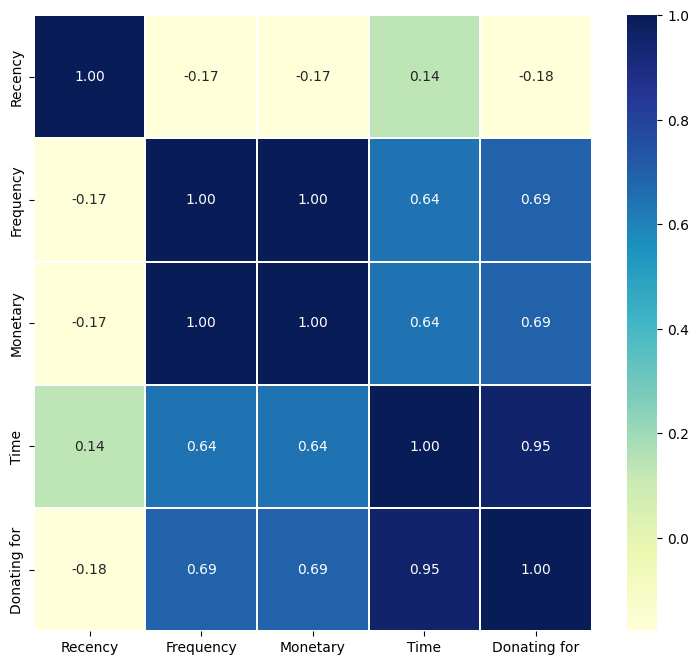

In [17]:
corrmat=x_train.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True)

In [18]:
x_train.drop(['Monetary'], axis = 1, inplace = True)
x_train.head(5)

,Recency,Frequency,Time,Donating for
97,4,9,38,34
516,3,5,12,9
156,2,1,2,0
395,16,10,89,73
732,23,1,23,0


In [19]:
x_train.shape

(598, 4)

In [20]:
x_test.drop(['Monetary'], axis = 1, inplace = True)
x_test.head(5)

,Recency,Frequency,Time,Donating for
258,4,3,28,24
521,2,11,41,39
14,2,6,15,13
31,4,10,28,24
505,2,41,98,96


In [21]:
x_test.shape


(150, 4)

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

X_train = scale.fit_transform(x_train)
X_test = scale.fit_transform(x_test)

In [23]:
X_train = pd.DataFrame(X_train, columns = ['Recency', 'Frequency', 'Time', 'Donating for'])
X_train.head(5)

,Recency,Frequency,Time,Donating for
0,-0.703977,0.625727,0.142370,0.362307
1,-0.832835,-0.074993,-0.916245,-0.648610
2,-0.961693,-0.775714,-1.323405,-1.012540
3,0.842316,0.800907,2.218883,1.939338
4,1.744321,-0.775714,-0.468370,-1.012540


In [24]:
X_test = pd.DataFrame(X_test, columns = ['Recency', 'Frequency', 'Time', 'Donating for'])
X_test.head(5)

,Recency,Frequency,Time,Donating for
0,-0.611669,-0.453642,-0.229537,0.012158
1,-0.827046,0.815287,0.323052,0.663486
2,-0.827046,0.022206,-0.782127,-0.465482
3,-0.611669,0.656671,-0.229537,0.012158
4,-0.827046,5.573772,2.745946,3.138533


In [25]:
X_train.shape

(598, 4)

In [26]:
X_test.shape

(150, 4)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [28]:
logreg = LogisticRegression(random_state=7)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("ROC Score: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.7466666666666667
ROC Score:  0.5441933318415754
Confusion Matrix: 
 [[108   1]
 [ 37   4]]


In [29]:
SVMC = SVC(probability=True)
SVMC.fit(X_train,y_train)
y_pred = SVMC.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("ROC Score: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.74
ROC Score:  0.5319982098903558
Confusion Matrix: 
 [[108   1]
 [ 38   3]]


In [30]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
pred=RFC.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test,pred))
print("ROC Score: ",roc_auc_score(y_test,pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,pred))

Accuracy Score:  0.72
ROC Score:  0.5562765719400313
Confusion Matrix: 
 [[100   9]
 [ 33   8]]


In [31]:
model=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test,pred))
print("ROC Score: ",roc_auc_score(y_test,pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,pred))


Accuracy Score:  0.78
ROC Score:  0.6736406354889236
Confusion Matrix: 
 [[99 10]
 [23 18]]


In [32]:
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,),random_state=1)
clf_neural.fit(X_train, y_train)
predicted = clf_neural.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,predicted))
print("ROC Score: ",roc_auc_score(y_test,predicted))
print("Confusion Matrix: \n",confusion_matrix(y_test,predicted))

Accuracy Score:  0.7533333333333333
ROC Score:  0.6400760796598791
Confusion Matrix: 
 [[97 12]
 [25 16]]


In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

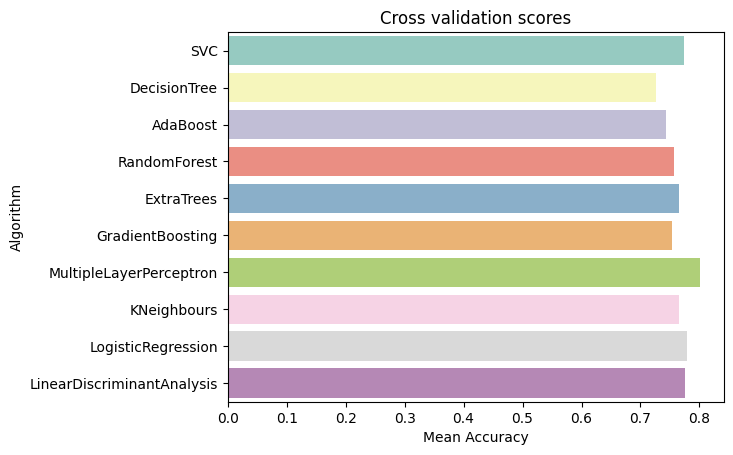

In [34]:
kfold = StratifiedKFold(n_splits=10)
random_state = 7
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighbours","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set3",orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [35]:

MLP = MLPClassifier()
mlp_param_grid = {'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
              }

gsGBC = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

gsGBC.best_score_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


0.802683615819209

In [36]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'],
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.7826553672316384

In [37]:
logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf = GridSearchCV(logModel, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
best_clf.best_estimator_



Fitting 2 folds for each of 1600 candidates, totalling 3200 fits


LogisticRegression(C=0.08858667904100823)

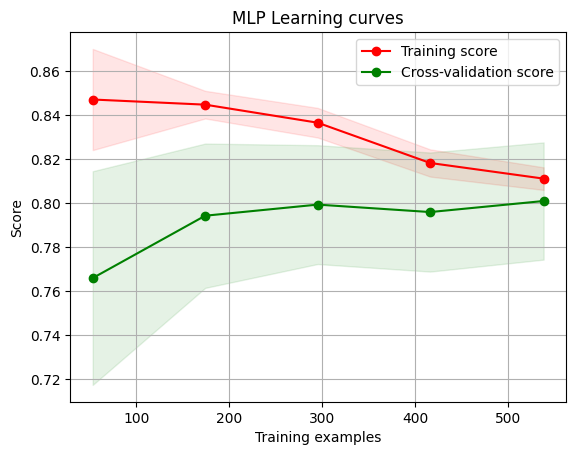

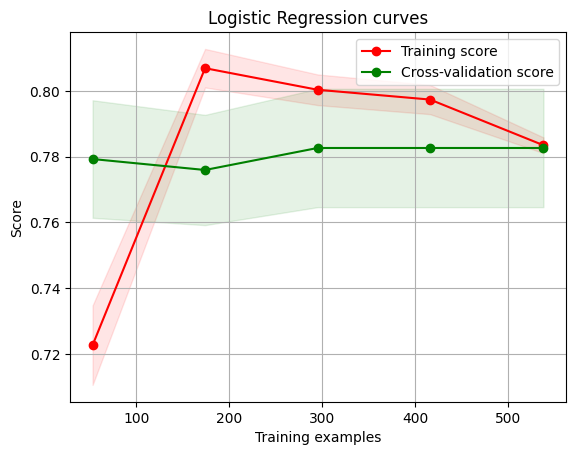

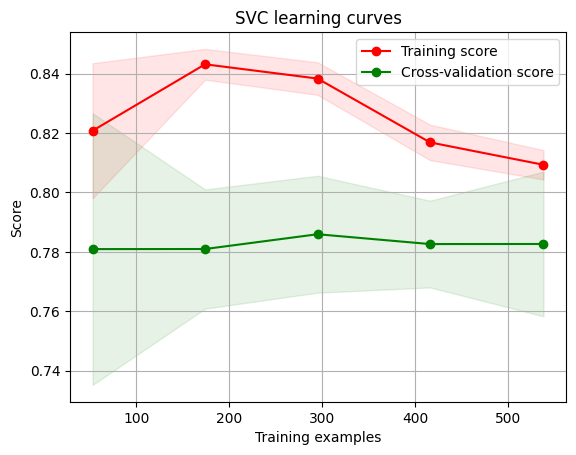

In [38]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsGBC.best_estimator_,"MLP Learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(best_clf.best_estimator_,"Logistic Regression curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)

In [41]:
predictions = gsGBC.predict_proba(X_test)
predictions = predictions[:,1]
pred_report = pd.DataFrame(predictions.tolist(), columns=["Made Donation in March 2007"])
pred_report.to_csv("final_submission.csv")